# 02 - Training Results - Comparing Loss Functions

In [1]:
import os

os.chdir('..')

In [2]:
from src.utils import visualization as viz
from src.dev import results

DATA_DIR = 'data/snake_clef2021_dataset/training_history/loss_functions/'


# load specification and progress data
specs_df = results.load_specs_files(DATA_DIR)
df = results.load_progress_files(specs_df, path=DATA_DIR)
specs_df

,model_name,history_file,specs_name,model,loss,opt,no_epochs,batch_size,total_batch_size,learning_rate,wd,full_ds,aug,scheduler,mixed_precision,model_mean,model_std,input_size,date
0,clef2021_resnest101_ce_06-20-2021_12-47,clef2021_resnest101_ce_06-20-2021_12-47.csv,clef2021_resnest101_ce_06-20-2021_12-47.json,resnest101,ce,sgd,30,128,128,0.01,0.01,False,False,False,False,"[0.485, 0.456, 0.406]","[0.229, 0.224, 0.225]",256,06-20-2021_12-47
1,clef2021_resnest101_f1_06-20-2021_21-05,clef2021_resnest101_f1_06-20-2021_21-05.csv,clef2021_resnest101_f1_06-20-2021_21-05.json,resnest101,f1,sgd,30,128,128,0.01,0.01,False,False,False,False,"[0.485, 0.456, 0.406]","[0.229, 0.224, 0.225]",256,06-20-2021_21-05
2,clef2021_resnest101_ce_weighted_06-20-2021_22-44,clef2021_resnest101_ce_weighted_06-20-2021_22-...,clef2021_resnest101_ce_weighted_06-20-2021_22-...,resnest101,ce_weighted,sgd,30,128,128,0.01,0.01,False,False,False,False,"[0.485, 0.456, 0.406]","[0.229, 0.224, 0.225]",256,06-20-2021_22-44


## Cross Entropy, Weighted Cross Entropy and F1 Loss tested on ResNeSt-101

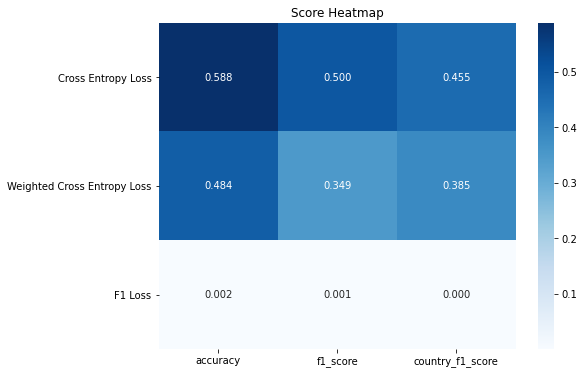

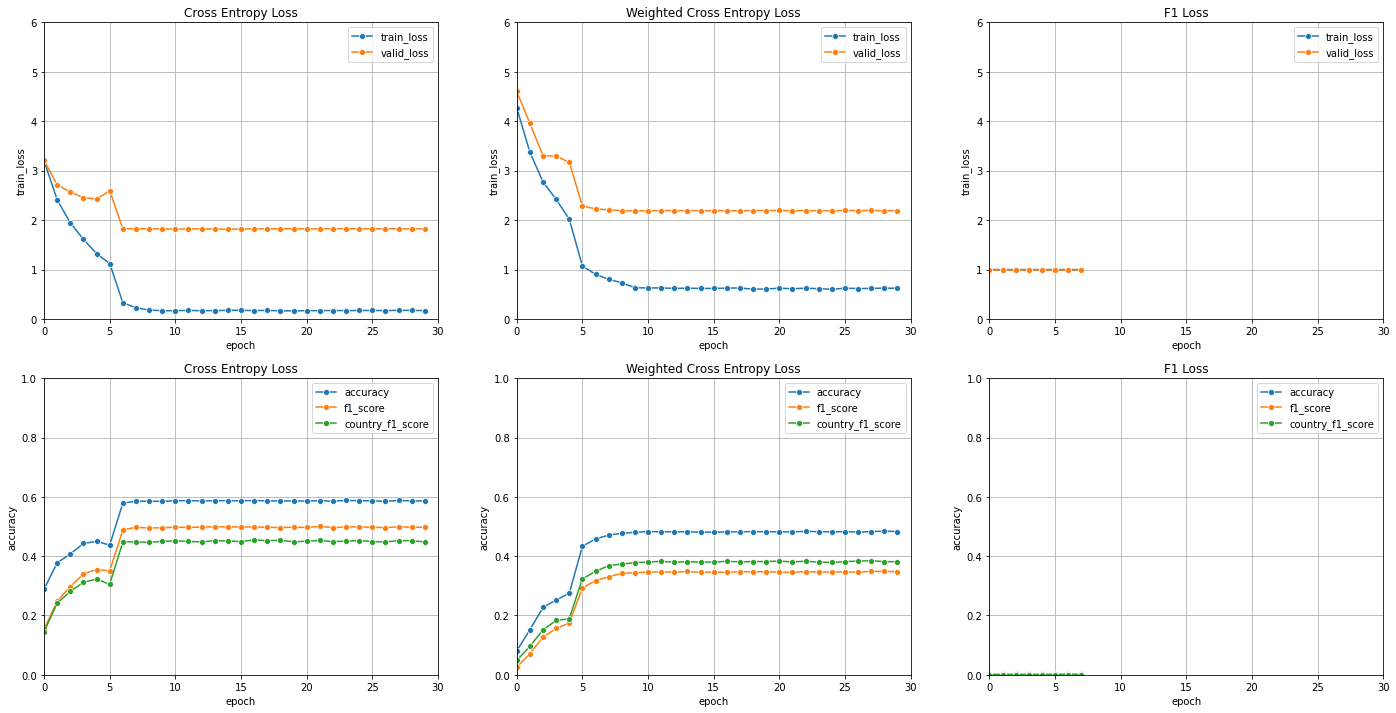

In [3]:
params = dict(model='resnest101')

g1 = results.filter_items(df, outlen=30, loss='ce', **params)
g2 = results.filter_items(df, outlen=30, loss='ce_weighted', **params)
g3 = results.filter_items(df, outlen=None, loss='f1', **params)

group_dict = {
    'Cross Entropy Loss': g1, 
    'Weighted Cross Entropy Loss': g2,
    'F1 Loss': g3}

viz.plot_score_heatmap(group_dict, cmap='Blues')
viz.compare_training_process(group_dict)